<p><font size="6"><b> 02 - Pandas: Basic operations on Series and DataFrames</b></font></p>


> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2019*

> *© 2016-2019, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.


In [2]:
# redefining the example objects

population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9})

countries = pd.DataFrame({'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']})

In [3]:
countries.head()

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


# The 'new' concepts

## Elementwise-operations 

Just like with numpy arrays, many operations are element-wise:

In [4]:
population / 100

Germany           0.813
Belgium           0.113
France            0.643
United Kingdom    0.649
Netherlands       0.169
dtype: float64

In [5]:
countries['population'] / countries['area']

0    0.000370
1    0.000096
2    0.000228
3    0.000407
4    0.000265
dtype: float64

In [6]:
np.log(countries['population'])

0    2.424803
1    4.163560
2    4.398146
3    2.827314
4    4.172848
Name: population, dtype: float64

which can be added as a new column, as follows:

In [7]:
countries["log_population"] = np.log(countries['population'])

In [8]:
countries.columns

Index(['country', 'population', 'area', 'capital', 'log_population'], dtype='object')

In [9]:
countries['population'] > 40

0    False
1     True
2     True
3    False
4     True
Name: population, dtype: bool

<div class="alert alert-info">

<b>REMEMBER</b>:

* When you have an operation which does NOT work element-wise or you have no idea how to do it directly in Pandas, use the **apply()** function
* A typical use case is with a custom written or a **lambda** function

</div>

In [11]:
countries["capital"].apply(lambda x: len(x)) # in case you forgot the functionality: countries["capital"].str.len()

0    8
1    5
2    6
3    9
4    6
Name: capital, dtype: int64

In [12]:
def population_annotater(population):
    """annotate as large or small"""
    if population > 50:
        return 'large'
    else:
        return 'small'

In [13]:
countries["population"].apply(population_annotater) # a custom user function

0    small
1    large
2    large
3    small
4    large
Name: population, dtype: object

## Aggregations (reductions)

Pandas provides a large set of **summary** functions that operate on different kinds of pandas objects (DataFrames, Series, Index) and produce single value. When applied to a DataFrame, the result is returned as a pandas Series (one value for each column). 

The average population number:

In [14]:
population.mean()

47.739999999999995

The minimum area:

In [15]:
countries['area'].min()

30510

For dataframes, often only the numeric columns are included in the result:

In [16]:
countries.median()

population            64.30000
area              244820.00000
log_population         4.16356
dtype: float64

# Application on a real dataset

Reading in the titanic data set...

In [17]:
df = pd.read_csv("../data/titanic.csv")

Quick exploration first...

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
len(df)

891

The available metadata of the titanic data set provides the following information:

VARIABLE   |  DESCRIPTION
------ | --------
Survived       | Survival (0 = No; 1 = Yes)
Pclass         | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name           | Name
Sex            | Sex
Age            | Age
SibSp          | Number of Siblings/Spouses Aboard
Parch          | Number of Parents/Children Aboard
Ticket         | Ticket Number
Fare           | Passenger Fare
Cabin          | Cabin
Embarked       | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>What is the average age of the passengers?</li>
</ul>

</div>

In [20]:
df['Age'].mean()

29.69911764705882

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>Plot the age distribution of the titanic passengers</li>
</ul>
</div>

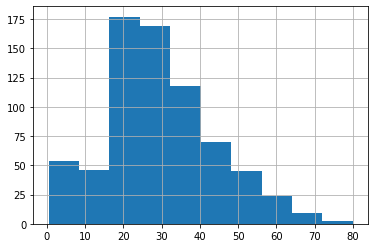

In [21]:
df['Age'].hist() #bins=30, log=True

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>What is the survival rate? (the relative number of people that survived)</li>
</ul>
<br>

Note: the 'Survived' column indicates whether someone survived (1) or not (0).
</div>

In [22]:
df['Survived'].sum() / len(df['Survived'])

0.3838383838383838

In [23]:
df['Survived'].mean()

0.3838383838383838

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum Fare? And the median?</li>
</ul>
</div>

In [24]:
df['Fare'].max()

512.3292

In [25]:
df['Fare'].median()

14.4542

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the 75th percentile (`quantile`) of the Fare price (Tip: look in the docstring how to specify the percentile)</li>
</ul>
</div>

In [26]:
df['Fare'].quantile(0.75)

31.0

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>Calculate the normalized Fares (normalized relative to its mean)</li>
</ul>
</div>

In [27]:
df['Fare'] / df['Fare'].mean()

0      0.225126
1      2.213478
2      0.246086
3      1.648853
4      0.249967
5      0.262646
6      1.610426
7      0.654418
8      0.345709
9      0.933754
10     0.518566
11     0.824426
12     0.249967
13     0.971146
14     0.243887
15     0.496829
16     0.904385
17     0.403674
18     0.558933
19     0.224350
20     0.807348
21     0.403674
22     0.249321
23     1.102340
24     0.654418
25     0.974640
26     0.224350
27     8.166635
28     0.244664
29     0.245179
         ...   
861    0.357096
862    0.805149
863    2.159656
864    0.403674
865    0.403674
866    0.430326
867    1.567988
868    0.294993
869    0.345709
870    0.245179
871    1.631905
872    0.155259
873    0.279467
874    0.745244
875    0.224350
876    0.305730
877    0.245179
878    0.245179
879    2.582218
880    0.807348
881    0.245179
882    0.326563
883    0.326044
884    0.218915
885    0.904385
886    0.403674
887    0.931555
888    0.728166
889    0.931555
890    0.240652
Name: Fare, Length: 891,

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>Calculate the log of the Fares, and add this as a new column ('Fare_log') to the DataFrame.</li>
</ul>
</div>

In [28]:
np.log(df['Fare'])

/home/joris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
5      2.135148
6      3.948596
7      3.048088
8      2.409941
9      3.403555
10     2.815409
11     3.279030
12     2.085672
13     3.442819
14     2.061048
15     2.772589
16     3.371597
17     2.564949
18     2.890372
19     1.977547
20     3.258097
21     2.564949
22     2.083085
23     3.569533
24     3.048088
25     3.446410
26     1.977547
27     5.572154
28     2.064226
29     2.066331
         ...   
861    2.442347
862    3.255370
863    4.242046
864    2.564949
865    2.564949
866    2.628884
867    3.921890
868    2.251292
869    2.409941
870    2.066331
871    3.961845
872    1.609438
873    2.197225
874    3.178054
875    1.977547
876    2.287045
877    2.066331
878    2.066331
879    4.420746
880    3.258097
881    2.066331
882    2.352964
883    2.351375
884    1.953028
885    3.371597
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891,

In [29]:
df['Fare_log'] = np.log(df['Fare'])
df.head()

/home/joris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.266662
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.070022
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.972177
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.085672


# Acknowledgement


> This notebook is partly based on material of Jake Vanderplas (https://github.com/jakevdp/OsloWorkshop2014).

---